In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings ('ignore')
from sklearn.model_selection import train_test_split 
import numpy as np

In [2]:
zomato=pd.read_csv('zomato.csv')

In [3]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
zomato.dtypes #(rate,approx_cost(for two people))

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

<Axes: >

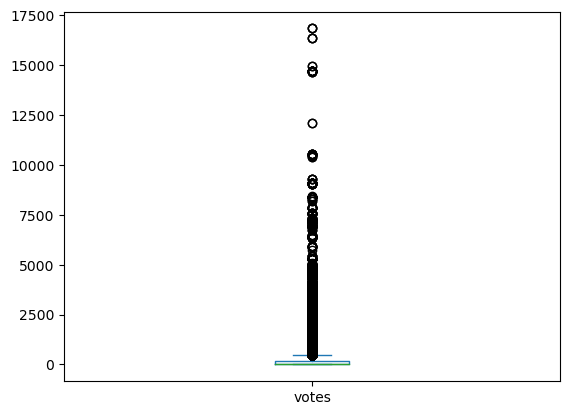

In [6]:
zomato.plot(kind='box')

In [7]:
zomato.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [8]:
zomato.skew()

votes    7.547819
dtype: float64

In [9]:
zomato.kurt()

votes    88.866738
dtype: float64

In [10]:
zomato.shape

(51717, 17)

In [11]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [12]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [13]:
zomato.std()

votes    803.838853
dtype: float64

In [14]:
zomato.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [15]:
#zomato['rate']=zomato['rate'].replace('-',np.nan).astype(float).astype(int)


In [16]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
zomato['rate'] = zomato['rate'].apply(lambda x : str(x).split("/")[0])

In [18]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [19]:
zomato['rate'] = zomato['rate'].replace('NEW', np.nan)
zomato['rate']=zomato['rate'].replace('-',np.nan)

In [20]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', 'nan',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [21]:
zomato['rate'] = zomato['rate'].astype('float64')

In [22]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [23]:
zomato['rate'] = zomato['rate'].fillna(0).astype(float)

In [24]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [25]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [26]:
#zomato['rate'] = zomato['rate'].fillna(0).astype(int)

In [27]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [28]:
zomato.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [29]:
zomato['rate'].unique

<bound method Series.unique of 0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    0.0
51714    0.0
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64>

In [31]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [32]:
zomato.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [33]:
zomato["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [34]:
zomato["approx_cost(for two people)"] = zomato["approx_cost(for two people)"].apply(lambda x : str(x).replace(",", ""))

In [35]:
zomato["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [36]:
zomato["approx_cost(for two people)"] = zomato['approx_cost(for two people)'].astype('float64')

In [37]:
zomato.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [38]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [39]:
def find_outliers(zomato): 
    #zomato=np.array(zomato)
    q1=zomato.quantile(0.25)
    q3=zomato.quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    outliers= zomato[~((zomato < lower_limit) | (zomato > upper_limit))].any(axis=1)
    return outliers

In [40]:
outliers= find_outliers(zomato)
print('Outliers', outliers)

Outliers 0        True
1        True
2        True
3        True
4        True
         ... 
51712    True
51713    True
51714    True
51715    True
51716    True
Length: 51717, dtype: bool


In [41]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [42]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [43]:
#dropping unnessary columns
zomato.drop(['url', 'address', 'name','phone','reviews_list',"location",'votes'],inplace=True, axis=1)

In [44]:
zomato.head()

,online_order,book_table,rate,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Yes,No,4.1,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,Yes,No,3.8,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,No,No,3.7,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,No,No,3.8,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari


In [45]:
zomato[~zomato.duplicated()]

,online_order,book_table,rate,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Yes,No,4.1,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,Yes,No,3.8,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,No,No,3.7,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,No,No,3.8,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,Bar,NaN,Continental,1500.0,[],Pubs and bars,Whitefield
51713,No,No,0.0,Bar,NaN,Finger Food,600.0,[],Pubs and bars,Whitefield
51714,No,No,0.0,Bar,NaN,Finger Food,2000.0,[],Pubs and bars,Whitefield
51715,No,Yes,4.3,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,[],Pubs and bars,Whitefield


In [46]:
zomato.isnull().sum()

online_order                       0
book_table                         0
rate                               0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [47]:
zomato['menu_item'].replace('[]',np.nan,inplace=True)


In [48]:
zomato['menu_item'].isnull().sum()

39617

In [49]:
(zomato['menu_item'].isnull().sum()/zomato.shape[0])*100

76.60343794110254

In [50]:
#hence we shall drop "menu_item"

In [51]:
zomato.drop('menu_item',axis=1,inplace=True)

In [52]:
zomato.head()

,online_order,book_table,rate,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [53]:
zomato["listed_in(type)"].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [54]:
zomato.drop("rest_type",axis=1)

,online_order,book_table,rate,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...
51712,No,No,3.6,NaN,Continental,1500.0,Pubs and bars,Whitefield
51713,No,No,0.0,NaN,Finger Food,600.0,Pubs and bars,Whitefield
51714,No,No,0.0,NaN,Finger Food,2000.0,Pubs and bars,Whitefield
51715,No,Yes,4.3,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


In [55]:
zomato.head(5)

,online_order,book_table,rate,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [56]:
zomato.rename(columns={"approx_cost(for two people)":"cost_for_2"},inplace=True)

In [57]:
zomato.columns

Index(['online_order', 'book_table', 'rate', 'rest_type', 'dish_liked',
       'cuisines', 'cost_for_2', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [58]:
zomato.isnull().sum()

online_order           0
book_table             0
rate                   0
rest_type            227
dish_liked         28078
cuisines              45
cost_for_2           346
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [59]:
zomato.drop("dish_liked",axis=1,inplace=True)

In [60]:
zomato.dropna(axis=0,inplace=True)

In [61]:
zomato.drop("rest_type",axis=1,inplace=True)

In [62]:
zomato.shape

(51148, 7)

In [63]:
zomato

,online_order,book_table,rate,cuisines,cost_for_2,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...
51712,No,No,3.6,Continental,1500.0,Pubs and bars,Whitefield
51713,No,No,0.0,Finger Food,600.0,Pubs and bars,Whitefield
51714,No,No,0.0,Finger Food,2000.0,Pubs and bars,Whitefield
51715,No,Yes,4.3,Finger Food,2500.0,Pubs and bars,Whitefield


In [64]:
zomato["cuisines"]

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51148, dtype: object

In [65]:
len(("North Indian, Chinese".split(",")))

2

In [66]:
zomato.shape

(51148, 7)

In [67]:
zomato["cuisines"]=zomato["cuisines"].apply(lambda x: len((x.split(","))))

In [68]:
zomato.head()

,online_order,book_table,rate,cuisines,cost_for_2,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,3,800.0,Buffet,Banashankari
1,Yes,No,4.1,3,800.0,Buffet,Banashankari
2,Yes,No,3.8,3,800.0,Buffet,Banashankari
3,No,No,3.7,2,300.0,Buffet,Banashankari
4,No,No,3.8,2,600.0,Buffet,Banashankari


In [69]:
df=pd.read_csv('zomato.csv')

In [70]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [71]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [72]:
def eitx(x):
    if type(x)==float:
        return x 
    elif x.isnumeric():
        return float(x)
    else:
        float(x.replace(',',''))

In [73]:
df['approx_cost(for two people)'].apply(eitx)

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51712      NaN
51713    600.0
51714      NaN
51715      NaN
51716      NaN
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [74]:
'800'.isnumeric()

True

In [75]:
float('5,000'.replace(",",""))

5000.0

In [76]:
type('-')

str

In [77]:
def edit(x):
    if type(x)==float:
        return x
    elif x.isalpha():
        return np.nan
    elif x=="-":
        return np.nan
    else:
        return float(x[:3])


In [78]:
df["rate"].apply(edit)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [79]:
df=zomato[~zomato.duplicated()]
df

,online_order,book_table,rate,cuisines,cost_for_2,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,3,800.0,Buffet,Banashankari
1,Yes,No,4.1,3,800.0,Buffet,Banashankari
2,Yes,No,3.8,3,800.0,Buffet,Banashankari
3,No,No,3.7,2,300.0,Buffet,Banashankari
4,No,No,3.8,2,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...
51712,No,No,3.6,1,1500.0,Pubs and bars,Whitefield
51713,No,No,0.0,1,600.0,Pubs and bars,Whitefield
51714,No,No,0.0,1,2000.0,Pubs and bars,Whitefield
51715,No,Yes,4.3,1,2500.0,Pubs and bars,Whitefield


In [80]:
df.isnull().sum()

online_order       0
book_table         0
rate               0
cuisines           0
cost_for_2         0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [81]:
df.shape

(37109, 7)

In [82]:
df["online_order"].replace({"Yes":1,"No":0},inplace=True)

In [83]:
df["online_order"]=df["online_order"].astype(float)

In [84]:
df_cat=df.select_dtypes(object)


In [85]:
df["online_order"]

0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
51712    0.0
51713    0.0
51714    0.0
51715    0.0
51716    0.0
Name: online_order, Length: 37109, dtype: float64

In [86]:
#df_num=df.select_dtypes(np.number).drop("online_order",axis=1)

In [87]:
# df_num

In [88]:
df.skew()

online_order   -0.361317
rate           -1.914306
cuisines        0.967902
cost_for_2      2.269485
dtype: float64

In [89]:
df1=pd.get_dummies(df,drop_first=True)

In [90]:
df1

,online_order,rate,cuisines,cost_for_2,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1.0,4.1,3,800.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,4.1,3,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3.8,3,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,3.7,2,300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,3.8,2,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,0.0,3.6,1,1500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51713,0.0,0.0,1,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51714,0.0,0.0,1,2000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51715,0.0,4.3,1,2500.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
 from sklearn.preprocessing import StandardScaler

In [92]:
df

,online_order,book_table,rate,cuisines,cost_for_2,listed_in(type),listed_in(city)
0,1.0,Yes,4.1,3,800.0,Buffet,Banashankari
1,1.0,No,4.1,3,800.0,Buffet,Banashankari
2,1.0,No,3.8,3,800.0,Buffet,Banashankari
3,0.0,No,3.7,2,300.0,Buffet,Banashankari
4,0.0,No,3.8,2,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...
51712,0.0,No,3.6,1,1500.0,Pubs and bars,Whitefield
51713,0.0,No,0.0,1,600.0,Pubs and bars,Whitefield
51714,0.0,No,0.0,1,2000.0,Pubs and bars,Whitefield
51715,0.0,Yes,4.3,1,2500.0,Pubs and bars,Whitefield


In [93]:
Blr_south=['Banashankari','Bannerghatta Road','BTM','Basavanagudi','Jayanagar','JP Nagar','Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block','Sarjapur Road','Whitefield','Electronic City','HSR','Bellandur']

In [94]:
Blr_north=['Rajajinagar','Church Street','MG Road','Marathahalli','New BEL Road','Old Airport Road','Residency Road','Malleshwaram','Marathahalli','Frazer Town','Indiranagar','Brigade Road','Kalyan Nagar','Kammanahalli','Brookefield']

In [95]:
df["listed_in(city)"]=df["listed_in(city)"].apply(lambda x : "B_North" if x in Blr_north else "B_South")

In [96]:
df

,online_order,book_table,rate,cuisines,cost_for_2,listed_in(type),listed_in(city)
0,1.0,Yes,4.1,3,800.0,Buffet,B_South
1,1.0,No,4.1,3,800.0,Buffet,B_South
2,1.0,No,3.8,3,800.0,Buffet,B_South
3,0.0,No,3.7,2,300.0,Buffet,B_South
4,0.0,No,3.8,2,600.0,Buffet,B_South
...,...,...,...,...,...,...,...
51712,0.0,No,3.6,1,1500.0,Pubs and bars,B_South
51713,0.0,No,0.0,1,600.0,Pubs and bars,B_South
51714,0.0,No,0.0,1,2000.0,Pubs and bars,B_South
51715,0.0,Yes,4.3,1,2500.0,Pubs and bars,B_South


In [97]:
x=df.drop("online_order",axis=1)

In [98]:
y=df["online_order"]

In [99]:
x

,book_table,rate,cuisines,cost_for_2,listed_in(type),listed_in(city)
0,Yes,4.1,3,800.0,Buffet,B_South
1,No,4.1,3,800.0,Buffet,B_South
2,No,3.8,3,800.0,Buffet,B_South
3,No,3.7,2,300.0,Buffet,B_South
4,No,3.8,2,600.0,Buffet,B_South
...,...,...,...,...,...,...
51712,No,3.6,1,1500.0,Pubs and bars,B_South
51713,No,0.0,1,600.0,Pubs and bars,B_South
51714,No,0.0,1,2000.0,Pubs and bars,B_South
51715,Yes,4.3,1,2500.0,Pubs and bars,B_South


In [100]:
x_encod=pd.get_dummies(x,drop_first=True)

In [101]:
x_encod

,rate,cuisines,cost_for_2,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_B_South
0,4.1,3,800.0,1,0,0,0,0,0,0,1
1,4.1,3,800.0,0,0,0,0,0,0,0,1
2,3.8,3,800.0,0,0,0,0,0,0,0,1
3,3.7,2,300.0,0,0,0,0,0,0,0,1
4,3.8,2,600.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
51712,3.6,1,1500.0,0,0,0,0,0,0,1,1
51713,0.0,1,600.0,0,0,0,0,0,0,1,1
51714,0.0,1,2000.0,0,0,0,0,0,0,1,1
51715,4.3,1,2500.0,1,0,0,0,0,0,1,1


In [102]:
ss=StandardScaler()
x_scale=pd.DataFrame(ss.fit_transform(x_encod),index=x_encod.index,columns=[i    for i in x_encod.columns])

In [103]:
x_scale

,rate,cuisines,cost_for_2,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_B_South
0,0.640346,0.284268,0.364067,2.247817,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,-0.134356,0.857391
1,0.640346,0.284268,0.364067,-0.444876,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,-0.134356,0.857391
2,0.400772,0.284268,0.364067,-0.444876,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,-0.134356,0.857391
3,0.320914,-0.454657,-0.678903,-0.444876,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,-0.134356,0.857391
4,0.400772,-0.454657,-0.053121,-0.444876,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,-0.134356,0.857391
...,...,...,...,...,...,...,...,...,...,...,...
51712,0.241056,-1.193582,1.824226,-0.444876,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,7.442893,0.857391
51713,-2.633826,-1.193582,-0.053121,-0.444876,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,7.442893,0.857391
51714,-2.633826,-1.193582,2.867196,-0.444876,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,7.442893,0.857391
51715,0.800061,-1.193582,3.910167,2.247817,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,7.442893,0.857391


In [104]:
np.mean(x_scale)

rate                                  3.848638e-16
cuisines                              1.003326e-16
cost_for_2                            1.225437e-17
book_table_Yes                        4.518798e-17
listed_in(type)_Cafes                 2.067925e-17
listed_in(type)_Delivery              3.645675e-16
listed_in(type)_Desserts             -9.956674e-18
listed_in(type)_Dine-out             -1.087575e-16
listed_in(type)_Drinks & nightlife    2.450874e-17
listed_in(type)_Pubs and bars        -3.982670e-17
listed_in(city)_B_South              -1.470524e-16
dtype: float64

In [105]:
#df1

In [106]:
#df_num["cost_for_2"].unique()

In [107]:
#df_num["cuisines"]=df_num["cuisines"].astype(float)

In [108]:
#df_num.dtypes

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y,test_size=0.3)

In [111]:
np.mean(xtrain)

rate                                  0.000013
cuisines                             -0.000993
cost_for_2                            0.005822
book_table_Yes                        0.001902
listed_in(type)_Cafes                 0.006208
listed_in(type)_Delivery             -0.005664
listed_in(type)_Desserts             -0.005763
listed_in(type)_Dine-out              0.003305
listed_in(type)_Drinks & nightlife    0.004346
listed_in(type)_Pubs and bars         0.000702
listed_in(city)_B_South              -0.000914
dtype: float64

In [112]:
np.mean(xtest)

rate                                 -0.000031
cuisines                              0.002317
cost_for_2                           -0.013585
book_table_Yes                       -0.004438
listed_in(type)_Cafes                -0.014486
listed_in(type)_Delivery              0.013215
listed_in(type)_Desserts              0.013447
listed_in(type)_Dine-out             -0.007710
listed_in(type)_Drinks & nightlife   -0.010139
listed_in(type)_Pubs and bars        -0.001637
listed_in(city)_B_South               0.002132
dtype: float64

In [113]:
df.shape

(37109, 7)

In [114]:
df1.shape

(37109, 40)

In [115]:
x_scale.shape

(37109, 11)

In [116]:
xtest.shape,xtrain.shape,ytest.shape,ytrain.shape

((11133, 11), (25976, 11), (11133,), (25976,))

In [117]:
xtrain.head()

,rate,cuisines,cost_for_2,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_B_South
7888,1.279208,1.023193,1.615632,2.247817,-0.216943,-0.890194,-0.301489,1.332728,-0.170559,-0.134356,-1.166329
13923,0.001483,-0.454657,-0.470309,-0.444876,-0.216943,1.123351,-0.301489,-0.750340,-0.170559,-0.134356,0.857391
10714,0.001483,0.284268,-0.678903,-0.444876,-0.216943,-0.890194,-0.301489,1.332728,-0.170559,-0.134356,0.857391
16815,0.879919,1.023193,0.155473,-0.444876,-0.216943,1.123351,-0.301489,-0.750340,-0.170559,-0.134356,0.857391
15815,0.560488,-0.454657,-0.678903,-0.444876,4.609512,-0.890194,-0.301489,-0.750340,-0.170559,-0.134356,0.857391


In [118]:
ytrain.head()

7888     0.0
13923    1.0
10714    0.0
16815    1.0
15815    1.0
Name: online_order, dtype: float64

In [119]:
xtest.head()

,rate,cuisines,cost_for_2,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_B_South
46159,0.241056,0.284268,-0.261715,-0.444876,4.609512,-0.890194,-0.301489,-0.75034,-0.170559,-0.134356,-1.166329
39759,0.081341,-0.454657,-0.887497,-0.444876,-0.216943,1.123351,-0.301489,-0.75034,-0.170559,-0.134356,-1.166329
8529,0.400772,0.284268,-0.678903,-0.444876,-0.216943,1.123351,-0.301489,-0.75034,-0.170559,-0.134356,0.857391
43085,0.400772,-0.454657,-0.678903,-0.444876,-0.216943,-0.890194,3.316869,-0.75034,-0.170559,-0.134356,-1.166329
32111,0.720203,0.284268,1.407038,2.247817,-0.216943,-0.890194,-0.301489,-0.75034,-0.170559,-0.134356,0.857391


In [120]:
ytest.head()

46159    1.0
39759    1.0
8529     1.0
43085    1.0
32111    1.0
Name: online_order, dtype: float64

In [122]:
df["online_order"].value_counts()/df["online_order"].shape*100

1.0    58.888679
0.0    41.111321
Name: online_order, dtype: float64

In [202]:
from scipy.stats import chi2_contingency
for i in x.columns:
    contingency_table = pd.crosstab(x[i], df['online_order'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    alpha = 0.05
    if p_value < alpha:
        
        print("Reject the null hypothesis: There is a significant association between " ,i,"and online order")
    else:
        print("Failed to reject the null hypothesis: There may not be a significant association between ",i,"and online order")

Failed to reject the null hypothesis: There may not be a significant association between  book_table and online order
Reject the null hypothesis: There is a significant association between  rate and online order
Reject the null hypothesis: There is a significant association between  cuisines and online order
Reject the null hypothesis: There is a significant association between  cost_for_2 and online order
Reject the null hypothesis: There is a significant association between  listed_in(type) and online order
Reject the null hypothesis: There is a significant association between  listed_in(city) and online order


In [124]:
#all the variables having significant association between the varaibles 

# MODEL BULIDING

In [125]:
#logistic regeression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score,confusion_matrix,precision_score,accuracy_score,roc_curve
from sklearn.feature_selection import RFE

In [127]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)



LogisticRegression()

In [128]:
import statsmodels.api as sm

In [230]:
basemodel=sm.Logit(ytrain,xtrain).fit()
basemodel.summary()

Optimization terminated successfully.
         Current function value: 0.619865
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           online_order   No. Observations:                25976
Model:                          Logit   Df Residuals:                    25965
Method:                           MLE   Df Model:                           10
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                 0.08426
Time:                        15:16:09   Log-Likelihood:                -16102.
converged:                       True   LL-Null:                       -17583.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
rate                                   0.4543      0.015     30.186      0.000       0.425       0.484
cuisines                               0.2297      0.014     16.037      0.000       0.202       0.258
cost_for_2                            -0.4039      0.020    -19.830      0.000      -0.444      -0.364
book_table_Yes                         0.2059      0.018     11.461      0.000       0.171       0.241
listed_in(type)_Cafes                  0.0835      0.023      3.686      0.000       0.039       0.128
listed_in(type)_Delivery               0.6761      0.047     14.436      0.000       0.584       0.768
listed_in(type)_Desserts               0.0799      0.029      2.781      0.005       0.024       0.136
listed_in(type)_Dine-out               0.1943      0.045      4.329      0.000       0.106       0.282
listed_in(type)_Drinks & nightlife    -0.1678      0.023     -7.340      0.000      -0.213      -0.123
listed_in(type)_Pubs and bars         -0.0793      0.020     -4.035      0.000      -0.118      -0.041
listed_in(city)_B_South                0.0703      0.013      5.233      0.000       0.044       0.097
======================================================================================================
"""

In [209]:
y.value_counts(normalize=True)

1.0    0.588887
0.0    0.411113
Name: online_order, dtype: float64

In [130]:
#log likely hood aproximately equal to zero  -good model
#llr value
#h0:model is insiginificat
#ha:model is significant
print(0.00<0.05)
#here llrp value less than alpha so reject null hypothesis ,model is significant
#

True


In [196]:
y.value_counts()

1.0    21853
0.0    15256
Name: online_order, dtype: int64

In [131]:
y_pred=model.predict(xtest)

In [132]:
# Ensure ytest and y_pred are of integer type
ytest = ytest.astype(int)
y_pred = y_pred.astype(int)

con = confusion_matrix(ytest, y_pred)

In [246]:
print(con)

[[2862 1741]
 [2050 4480]]


In [247]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.41      1.00      0.59      4603
           1       0.00      0.00      0.00      6530

    accuracy                           0.41     11133
   macro avg       0.21      0.50      0.29     11133
weighted avg       0.17      0.41      0.24     11133



In [248]:
#BASE KNN MODEL

In [249]:
KNN=KNeighborsClassifier()

In [250]:
knn_modelbase=knn.fit(xtrain,ytrain)

In [251]:
y_pred_knnbase=knn_modelbase.predict(xtest)

In [297]:
print(classification_report(ytest,y_pred_knnbase))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61      4603
           1       0.72      0.78      0.75      6530

    accuracy                           0.70     11133
   macro avg       0.69      0.68      0.68     11133
weighted avg       0.69      0.70      0.69     11133



In [273]:
#GaussianNB model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_model=gnb.fit(xtrain,ytrain)
y_pred_gnb=gnb_model.predict(xtest)
print(classification_report(ytest,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.67      0.32      0.43      4603
           1       0.65      0.89      0.75      6530

    accuracy                           0.65     11133
   macro avg       0.66      0.60      0.59     11133
weighted avg       0.66      0.65      0.62     11133



In [280]:
#decision tree base model
base_dt=dt.fit(xtrain,ytrain)

In [281]:
y_pred_basedt=base_dt.predict(xtest)

In [282]:
print(classification_report(ytest,y_pred_basedt))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      4603
           1       0.77      0.76      0.76      6530

    accuracy                           0.73     11133
   macro avg       0.72      0.72      0.72     11133
weighted avg       0.73      0.73      0.73     11133



In [214]:
#random forest base model

In [215]:
random_forest_classification = RandomForestClassifier(random_state = 10)

In [224]:
base_rdmodel=random_forest_classification.fit(xtrain,ytrain)

In [232]:
y_pred_baserd=base_rdmodel.predict(xtest)

In [233]:
print(classification_report(ytest,y_pred_baserd))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      4603
           1       0.76      0.80      0.78      6530

    accuracy                           0.73     11133
   macro avg       0.72      0.72      0.72     11133
weighted avg       0.73      0.73      0.73     11133



In [227]:
y_pred_train=base_rdmodel.predict(xtrain)

In [228]:
print(classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78     10653
         1.0       0.84      0.88      0.86     15323

    accuracy                           0.83     25976
   macro avg       0.83      0.82      0.82     25976
weighted avg       0.83      0.83      0.83     25976



In [312]:
# Ada boost model 
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [311]:
ada= AdaBoostClassifier(random_state=0)
ada_base=ada.fit(xtrain,ytrain)
ada_pred=ada_base.predict(xtest)
print(classification_report(ytest,ada_pred))

              precision    recall  f1-score   support

           0       0.66      0.48      0.56      4603
           1       0.69      0.82      0.75      6530

    accuracy                           0.68     11133
   macro avg       0.68      0.65      0.65     11133
weighted avg       0.68      0.68      0.67     11133



In [308]:
xtrain.shape

(25976, 11)

In [309]:
ytrain.shape

(25976,)

In [307]:
y.dtypes

dtype('float64')

In [313]:
#GRadient Base Model
gnd= GradientBoostingClassifier(random_state=0)
gnd_base=gnd.fit(xtrain,ytrain)
gnd_pred=gnd_base.predict(xtest)
print(classification_report(ytest,gnd_pred))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59      4603
           1       0.71      0.82      0.76      6530

    accuracy                           0.70     11133
   macro avg       0.69      0.67      0.68     11133
weighted avg       0.69      0.70      0.69     11133



In [ ]:
#XGBOOST BASE MODEL

In [294]:
xg=XGBClassifier()
xg_base=xg.fit(xtrain,ytrain)
xg_pred=xg_base.predict(xtest)
print(classification_report(ytest,xg_pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.64      4603
           1       0.74      0.85      0.79      6530

    accuracy                           0.73     11133
   macro avg       0.73      0.71      0.71     11133
weighted avg       0.73      0.73      0.73     11133



In [ ]:
#XG BOOST GRID SEARCH

In [296]:

tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBClassifier()


xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')


xgb_grid.fit(xtrain,ytrain)
#best params buliding the model

xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model = xgb_grid_model.fit(xtrain, ytrain)


y_pred_xg=xgb_model.predict(xtest)
print(classification_report(ytest,y_pred_xg))

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

              precision    recall  f1-score   support

           0       0.72      0.63      0.67      4603
           1       0.76      0.83      0.79      6530

    accuracy                           0.75     11133
   macro avg       0.74      0.73      0.73     11133
weighted avg       0.75      0.75      0.74     11133

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.6, 'max_depth': 8} 



In [138]:
#evaluvationg precision,recall and f1score our model is good
#but in the case of accuracy only 65 % we get so we want to increse the accuracy score

# BUSINESS INTERPRETATIONS

In [ ]:
Initial XGBoost Model:
Precision and Recall:
Class 0 (No online order): The precision is 72%, indicating that when the model predicts no online order, 
it is correct 72% of the time. However, the recall is 57%, suggesting that the model misses 43% of instances 
where there is no online order.
Class 1 (Online order): The precision is 74%, meaning that when the model predicts an online order,
it is correct 74% of the time. The recall is higher at 85%, indicating that the model is good at 
capturing instances with online orders.
Accuracy: The overall accuracy of the model is 73%.
XGBoost Model after Grid Search:
Precision and Recall:
Class 0 (No online order): The precision improved slightly to 72%, and the recall increased to 63%. 
This suggests that the model is now better at identifying instances with no online orders.
Class 1 (Online order): The precision increased to 76%, indicating better accuracy in predicting online orders. 
The recall slightly decreased to 83%.
Accuracy: The overall accuracy improved to 75%.
Business Interpretations:
    
Improved Precision for Online Orders:

After grid search, the model's precision for predicting online orders increased from 74% to 76%. 
This means that businesses using this model can be more confident in the predictions when the model suggests 
that a customer will place an online order.
Better Identification of No Online Orders:

The model's recall for class 0 (no online order) increased from 57% to 63%. This indicates an
improvement in identifying instances where customers are not likely to place online orders. Businesses
can benefit from this by optimizing resource allocation and marketing strategies for customers less likely to order online.
Optimized Hyperparameters:

The best parameters obtained from the grid search ('gamma': 0, 'learning_rate': 0.6, 'max_depth': 8) 
suggest that these hyperparameter values contribute to the improved model performance. Businesses should 
consider using these optimized parameters for future predictions.
Overall Model Enhancement:

The overall accuracy increased from 73% to 75%, indicating a general improvement in 
the model's ability to correctly classify instances. Businesses relying on this model can expect more reliable 
predictions, which can lead to better decision-making.
Consideration for Trade-offs:

While precision and recall have improved for certain classes, it's essential to consider the specific business goals. 
For example, if the cost of false positives or false negatives varies significantly, the model may need to be fine-tuned 
to achieve the desired balance.
In summary, the grid search has fine-tuned the XGBoost model, leading to improvements in precision, recall, 
and overall accuracy. Businesses can leverage these enhancements for better decision support in predicting online orders.
Regular monitoring and updates to the model may be necessary to adapt to changing customer behaviors and preferences.